<a href="https://colab.research.google.com/github/Sumetjutha/MyProject/blob/main/25_LearnWorkshopFromFutureSkills1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import Important Library
from statistics import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
import plotly.express as px
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.1.5
numpy version: 1.19.5
seaborn version: 0.11.1
sklearn version: 0.22.2.post1


In [6]:
# Reading files
data = pd.read_csv("/content/drive/MyDrive/Datasets_all/data.csv")

In [7]:
# EDA (Exploratory Data Analysis)
data.shape

(1500014, 15)

In [8]:
# drop data that is not relative with information
data = data.drop(columns=['Unnamed: 0'])

In [9]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00


In [10]:
# Check head of data 7 row #
data.head(7)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
5,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
6,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28


In [11]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,NaN,NaN,NaN
1500010,Australia and Oceania,NaN,Household,Online,L,12/5/2016,937431466,12/8/2016,5657,668.27,502.54,3780403.39,2842868.78,937534.61
1500011,Central America and the Caribbean,NaN,Household,Offline,C,11/19/2011,274930989,12/13/2011,7044,668.27,502.54,4707293.88,3539891.76,1167402.12
1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,NaN,NaN,NaN


In [12]:
# check list of columns #
list(data.columns)

['Region',
 'Country',
 'Item Type',
 'Sales Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [13]:
# Set 2 digit of data

data.describe().round(2)

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.500014e+06,1500014.00,1500014.00,1500014.00,1500009.00,1500009.00,1.500009e+06
mean,5.500679e+08,4999.30,266.05,187.55,1329889.20,937489.14,5.939205e+07
std,2.599833e+08,2885.55,217.00,175.67,1468814.34,1149109.12,7.144790e+10
min,1.000012e+08,1.00,9.33,6.92,9.33,6.92,2.410000e+00
25%,3.246868e+08,2501.00,81.73,35.84,277718.54,161817.60,9.506640e+04
50%,5.497915e+08,4998.00,154.06,97.44,785329.26,467357.49,2.813704e+05
75%,7.756273e+08,7498.00,421.89,263.33,1821933.36,1196571.52,5.654252e+05
max,9.999999e+08,10000.00,668.27,524.96,6682700.00,5249600.00,8.750000e+13


In [14]:
# check information 
data.info

<bound method DataFrame.info of                                     Region  ... Total Profit
0                       Sub-Saharan Africa  ...      3839.13
1                       Sub-Saharan Africa  ...      3839.13
2             Middle East and North Africa  ...    338631.84
3             Middle East and North Africa  ...    338631.84
4                    Australia and Oceania  ...     20592.00
...                                    ...  ...          ...
1500009                               Asia  ...          NaN
1500010              Australia and Oceania  ...    937534.61
1500011  Central America and the Caribbean  ...   1167402.12
1500012                               Asia  ...          NaN
1500013       Middle East and North Africa  ...          NaN

[1500014 rows x 14 columns]>

In [15]:
# delte country that is = 0 (Nan)

data = data[data["Country"].notnull()]

In [16]:
# check shape of data again
data.shape

(1500008, 14)

In [17]:
# check information again
data.info 

<bound method DataFrame.info of                                Region  ... Total Profit
0                  Sub-Saharan Africa  ...      3839.13
1                  Sub-Saharan Africa  ...      3839.13
2        Middle East and North Africa  ...    338631.84
3        Middle East and North Africa  ...    338631.84
4               Australia and Oceania  ...     20592.00
...                               ...  ...          ...
1500006            Sub-Saharan Africa  ...          NaN
1500008         Australia and Oceania  ...          NaN
1500009                          Asia  ...          NaN
1500012                          Asia  ...          NaN
1500013  Middle East and North Africa  ...          NaN

[1500008 rows x 14 columns]>

In [18]:
# Rename columns of data #
data = data.rename(columns = {"Item Type": "Item_Type",
                              "Order Date": "Order_Date"
                              })

In [19]:
# check list of columns again #
list(data.columns)

['Region',
 'Country',
 'Item_Type',
 'Sales Channel',
 'Order Priority',
 'Order_Date',
 'Order ID',
 'Ship Date',
 'Units Sold',
 'Unit Price',
 'Unit Cost',
 'Total Revenue',
 'Total Cost',
 'Total Profit']

In [20]:
# add columns and round up for 2 digit
data["%margin"] = ((data["Total Profit"]/data["Total Revenue"])*100).round(2)

In [21]:
# Check Head of Data Again
data.head(2)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83


In [22]:
# Create if condition function

def if_condition(row):
  if row["%margin"] > 30:
    val = "good"
  else:
    val = "bad"
  return val

In [23]:
# Create Columns "decision" use function if from above
data["decision"] = data.apply(if_condition, axis=1)

In [24]:
# Checked head of data again
data.head(2)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad


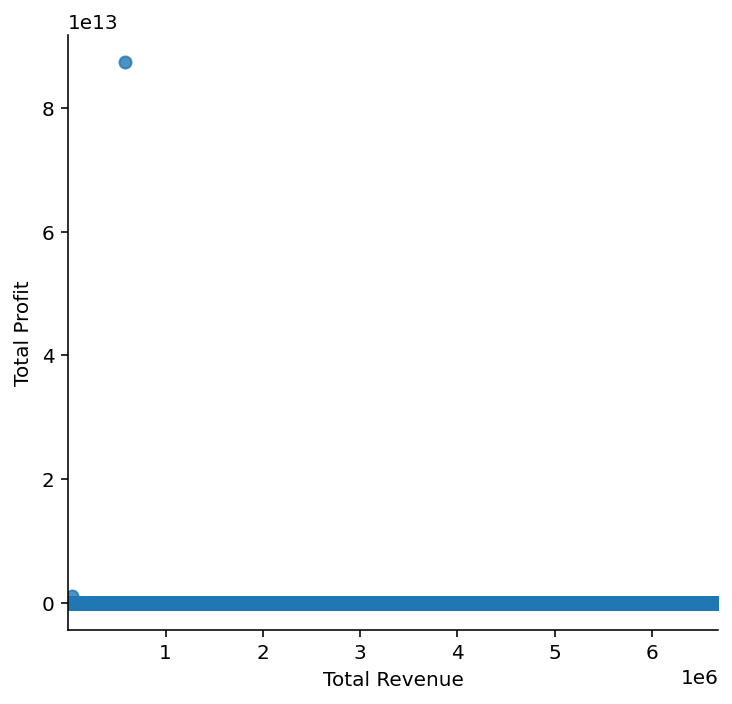

In [25]:
### for check outlier

# plot graph scatter plot for review distribution of data define x axis as "Total revenue"
# y axis as "Total"
# CI = confident interval
sns.lmplot(x = "Total Revenue", y = "Total Profit", data = data, ci=None)

In [26]:
# We want to know cause of outlier data by show maximum data that is outlier data
data.loc[data["Total Profit"].idxmax()]

Region            Sub-Saharan Africa
Country                        Ghana
Item_Type            Office Supplies
Sales Channel                    NaN
Order Priority                     L
Order_Date                 3/23/2017
Order ID                   601245963
Ship Date                  4/15/2017
Units Sold                       896
Unit Price                    651.21
Unit Cost                     524.96
Total Revenue                 583484
Total Cost                    470364
Total Profit                8.75e+13
%margin                  1.49961e+10
decision                        good
Name: 1500003, dtype: object

In [27]:
# We want to know top ten of Total Profit for check again for sure.
data.sort_values("Total Profit", ascending = False).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision
1500003,Sub-Saharan Africa,Ghana,Office Supplies,NaN,L,3/23/2017,601245963,4/15/2017,896,651.21,524.96,583484.16,470364.16,8.750000e+13,1.499612e+10,good
1500005,Sub-Saharan Africa,Uganda,Personal Care,Online,M,6/19/2014,539471471,7/21/2014,451,81.73,56.67,36860.23,25558.17,1.000000e+12,2.712951e+09,good
897995,Asia,Maldives,Cosmetics,Online,H,4/12/2016,340228402,5/23/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
1279511,Asia,Kyrgyzstan,Cosmetics,Offline,H,2/28/2016,952044570,3/18/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
275470,Sub-Saharan Africa,Senegal,Cosmetics,Online,M,2/18/2016,174407804,2/22/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
942016,Middle East and North Africa,United Arab Emirates,Cosmetics,Offline,L,3/8/2016,829681336,4/11/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
1467797,Europe,Romania,Cosmetics,Online,M,3/17/2016,707318103,5/4/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
583126,Asia,Maldives,Cosmetics,Online,H,4/11/2016,340228402,5/22/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good
1426741,Sub-Saharan Africa,Zambia,Cosmetics,Offline,C,6/30/2016,138959300,7/20/2016,10000,437.20,263.33,4372000.00,2633300.00,1.738700e+06,3.977000e+01,good


In [28]:
# drop outlier data
data = data.drop(1500005)
data = data.drop(1500003)

In [29]:
# Try to sort data
data.sort_values("Total Profit", ascending = True).head(3)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
1016058,Europe,Luxembourg,Fruits,Offline,L,6/14/2013,412308156,7/19/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad


In [30]:
# Check top 5 of Total Revenue
data.sort_values("Total Revenue", ascending = False).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision
468659,Sub-Saharan Africa,Comoros,Household,Online,L,6/26/2011,546093308,7/3/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
142999,Sub-Saharan Africa,Senegal,Household,Online,C,2/24/2011,459178578,3/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1099878,Europe,Bosnia and Herzegovina,Household,Online,M,6/9/2011,790819776,7/7/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1085903,Europe,Sweden,Household,Offline,C,6/18/2011,668456542,7/31/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
803322,Sub-Saharan Africa,Zimbabwe,Household,Offline,H,7/5/2011,423730075,7/26/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
727845,Middle East and North Africa,Yemen,Household,Offline,H,3/14/2011,214452111,4/18/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
402635,Sub-Saharan Africa,Cape Verde,Household,Online,M,5/14/2011,257909476,6/19/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1028057,Europe,Armenia,Household,Offline,H,4/26/2011,502635943,5/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
142998,Sub-Saharan Africa,Senegal,Household,Online,C,2/24/2011,459178578,3/2/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad
1399426,Europe,Slovakia,Household,Online,C,5/5/2011,380272710,5/26/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,24.8,bad


In [31]:
# Check top 5 of Total Revenue
data.sort_values("Total Revenue", ascending = True).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision
470541,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
492351,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
575497,Middle East and North Africa,Tunisia,Fruits,Online,M,8/31/2013,211039054,9/14/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
470540,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
426590,Middle East and North Africa,Qatar,Fruits,Online,H,7/18/2013,822855222,8/30/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
1016058,Europe,Luxembourg,Fruits,Offline,L,6/14/2013,412308156,7/19/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
1239029,Asia,China,Fruits,Offline,L,7/10/2013,945218455,8/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
575498,Middle East and North Africa,Tunisia,Fruits,Online,M,8/31/2013,211039054,9/14/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad


In [32]:
# Check % of Margin

data.sort_values("%margin", ascending = False).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision
1092717,Central America and the Caribbean,Antigua and Barbuda,Clothes,Offline,H,12/23/2016,202264583,1/12/2017,3440,109.28,35.84,375923.20,123289.60,252633.60,67.2,good
1244997,Europe,France,Clothes,Offline,C,11/21/2012,334083354,12/10/2012,1543,109.28,35.84,168619.04,55301.12,113317.92,67.2,good
398974,Europe,France,Clothes,Online,M,9/15/2013,835613095,10/14/2013,5339,109.28,35.84,583445.92,191349.76,392096.16,67.2,good
1245020,Sub-Saharan Africa,Eritrea,Clothes,Offline,C,10/31/2015,608909356,11/28/2015,8665,109.28,35.84,946911.20,310553.60,636357.60,67.2,good
158959,Central America and the Caribbean,Panama,Clothes,Offline,L,6/27/2010,991353738,7/15/2010,2456,109.28,35.84,268391.68,88023.04,180368.64,67.2,good
158960,Central America and the Caribbean,Panama,Clothes,Offline,L,6/27/2010,991353738,7/15/2010,2456,109.28,35.84,268391.68,88023.04,180368.64,67.2,good
610824,Australia and Oceania,Federated States of Micronesia,Clothes,Online,C,9/21/2016,818090331,10/21/2016,9964,109.28,35.84,1088865.92,357109.76,731756.16,67.2,good
861058,Europe,United Kingdom,Clothes,Online,H,6/11/2016,448429572,7/1/2016,9130,109.28,35.84,997726.40,327219.20,670507.20,67.2,good
861060,Sub-Saharan Africa,Madagascar,Clothes,Online,C,6/6/2015,936628949,7/19/2015,8175,109.28,35.84,893364.00,292992.00,600372.00,67.2,good
1245001,Sub-Saharan Africa,Equatorial Guinea,Clothes,Offline,L,12/18/2011,223178088,12/29/2011,2211,109.28,35.84,241618.08,79242.24,162375.84,67.2,good


In [33]:
# Check % of Margin

data.sort_values("%margin", ascending = True).head(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision
143232,Sub-Saharan Africa,Uganda,Meat,Offline,C,4/10/2013,598110997,5/14/2013,3190,421.89,364.69,1345829.10,1163361.10,182468.0,13.56,bad
831099,Asia,Thailand,Meat,Offline,H,9/13/2015,261373174,9/14/2015,4985,421.89,364.69,2103121.65,1817979.65,285142.0,13.56,bad
556991,Middle East and North Africa,Morocco,Meat,Online,H,10/31/2012,510798871,12/9/2012,5592,421.89,364.69,2359208.88,2039346.48,319862.4,13.56,bad
1151936,Sub-Saharan Africa,Comoros,Meat,Online,C,10/27/2015,775944459,11/19/2015,8063,421.89,364.69,3401699.07,2940495.47,461203.6,13.56,bad
623841,Sub-Saharan Africa,Zimbabwe,Meat,Online,M,4/4/2014,380536210,5/22/2014,7976,421.89,364.69,3364994.64,2908767.44,456227.2,13.56,bad
232678,Europe,Denmark,Meat,Online,C,11/27/2015,505518567,12/5/2015,3033,421.89,364.69,1279592.37,1106104.77,173487.6,13.56,bad
743311,Central America and the Caribbean,Dominica,Meat,Offline,L,4/15/2013,884086835,5/23/2013,9796,421.89,364.69,4132834.44,3572503.24,560331.2,13.56,bad
743303,Central America and the Caribbean,Nicaragua,Meat,Online,H,11/25/2013,309718167,1/7/2014,1343,421.89,364.69,566598.27,489778.67,76819.6,13.56,bad
668415,Europe,Luxembourg,Meat,Online,M,3/21/2017,741202771,3/22/2017,7226,421.89,364.69,3048577.14,2635249.94,413327.2,13.56,bad
272985,Middle East and North Africa,Kuwait,Meat,Offline,H,9/22/2014,974938189,11/8/2014,4730,421.89,364.69,1995539.70,1724983.70,270556.0,13.56,bad


In [34]:
# Checking tail data
data.tail(10)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision
1499996,Australia and Oceania,Samoa,Snacks,Offline,M,8/21/2013,346272170,9/11/2013,8485,152.58,97.44,1294641.30,826778.40,467862.90,36.14,good
1499997,Europe,Denmark,Baby Food,Online,L,2/27/2017,458885467,3/23/2017,3262,255.28,159.42,832723.36,520028.04,312695.32,37.55,good
1499998,Middle East and North Africa,Jordan,Cereal,Offline,L,5/27/2012,925852906,6/22/2012,9304,205.70,117.11,1913832.80,1089591.44,824241.36,43.07,good
1499999,Sub-Saharan Africa,Djibouti,Fruits,Online,H,9/1/2013,385552585,9/7/2013,2432,9.33,6.92,22690.56,16829.44,5861.12,25.83,bad
1500004,NaN,Tanzania,Cosmetics,Offline,L,5/23/2016,739008080,5/24/2016,7768,437.20,263.33,3396169.60,2045547.44,1350622.16,39.77,good
1500006,Sub-Saharan Africa,Zimbabwe,Office Supplies,Offline,C,3/28/2011,953361213,4/8/2011,9623,651.21,524.96,NaN,NaN,NaN,NaN,bad
1500008,Australia and Oceania,Vanuatu,Fruits,Online,C,11/3/2013,571997869,11/11/2013,5735,9.33,6.92,NaN,NaN,NaN,NaN,bad
1500009,Asia,India,Snacks,Online,L,10/10/2012,440306556,11/20/2012,5349,152.58,97.44,NaN,NaN,NaN,NaN,bad
1500012,Asia,Brunei,Cereal,Offline,L,5/28/2013,153842341,7/16/2013,4222,205.70,117.11,NaN,NaN,NaN,NaN,bad
1500013,Middle East and North Africa,Israel,Beverages,Offline,H,9/8/2013,371502530,10/13/2013,4709,47.45,31.79,NaN,NaN,NaN,NaN,bad


In [35]:
# checking Missing data
data.isnull().sum()

Region            1
Country           0
Item_Type         0
Sales Channel     0
Order Priority    0
Order_Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     5
Total Cost        5
Total Profit      5
%margin           5
decision          0
dtype: int64

In [36]:
## How to

## delete => .drop
## replace with 0 => .fillna(0)
## replace with average value => fillna(data.mean())
## replace with max => fillna(data.max())
## replace with min => fillna(data.min())
## replace with mode => fillna(data.mode())

In [37]:
# Manage value of Total Revenue by new compute
data["Total Revenue"] = (data["Units Sold"] * data["Unit Price"]).round(2)
data["Total Cost"] = (data["Units Sold"] * data["Unit Cost"]).round(2)
data["Total Profit"] = (data["Total Revenue"] - data["Total Cost"]).round(2)
data["%margin"] = ((data["Total Profit"] / data["Total Revenue"]) * 100).round(2)

In [38]:
# check .info
data.info

<bound method DataFrame.info of                                Region           Country  ... %margin decision
0                  Sub-Saharan Africa      South Africa  ...   25.83      bad
1                  Sub-Saharan Africa      South Africa  ...   25.83      bad
2        Middle East and North Africa           Morocco  ...   67.20     good
3        Middle East and North Africa           Morocco  ...   67.20     good
4               Australia and Oceania  Papua New Guinea  ...   13.56      bad
...                               ...               ...  ...     ...      ...
1500006            Sub-Saharan Africa          Zimbabwe  ...   19.39      bad
1500008         Australia and Oceania           Vanuatu  ...   25.83      bad
1500009                          Asia             India  ...   36.14      bad
1500012                          Asia            Brunei  ...   43.07      bad
1500013  Middle East and North Africa            Israel  ...   33.00      bad

[1500006 rows x 16 columns]>

In [39]:
# checking Missing data again
data.isnull().sum()

Region            1
Country           0
Item_Type         0
Sales Channel     0
Order Priority    0
Order_Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
%margin           0
decision          0
dtype: int64

In [40]:
# Next we will add column is year for deep analysis by separate from "Order_Date"
data["Year"] = pd.DatetimeIndex(data["Order_Date"]).year

In [41]:
# Next we will add column is month for deep analysis by separate from "Order_Date"
data["Month"] = pd.DatetimeIndex(data["Order_Date"]).month 

In [42]:
# Replace name of Month
data = data.replace({"Month":{
    1:"1_January",
    2:"2_February",
    3:"3_March",
    4:"4_April",
    5:"5_May",
    6:"6_June",
    7:"7_July",
    8:"8_August",
    9:"9_September",
    10:"10_October",
    11:"11_November",
    12:"12_December"
}
})

In [43]:
data.head(3)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision,Year,Month
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad,2012,7_July
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad,2012,7_July
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9_September


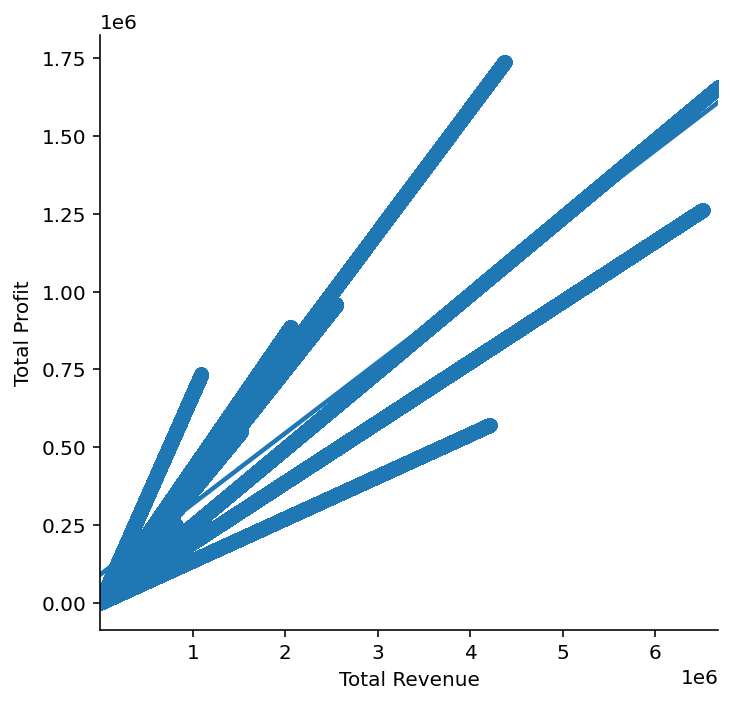

In [44]:
# Check scatter plot again

### for check outlier

# plot graph scatter plot for review distribution of data define x axis as "Total revenue"
# y axis as "Total"
# CI = confident interval
sns.lmplot(x = "Total Revenue", y = "Total Profit", data = data, ci=None)

In [45]:
############################## End FOR EDA (Exploratory Data Analysis) ####################

In [46]:
################## Step Data Analysis #####################

In [47]:
# Sort Data min to max
data.sort_values("Total Profit", ascending = True)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision,Year,Month
576729,Central America and the Caribbean,Honduras,Fruits,Online,M,6/22/2013,289944922,8/11/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,6_June
801014,Central America and the Caribbean,Trinidad and Tobago,Fruits,Offline,L,9/18/2013,866312587,10/31/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,9_September
669807,Central America and the Caribbean,Grenada,Fruits,Online,H,5/10/2013,901761090,6/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,5_May
492351,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,5_May
492352,Asia,Bhutan,Fruits,Online,M,5/27/2013,657034623,6/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,5_May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4_April
1180739,Europe,Sweden,Cosmetics,Offline,L,6/12/2016,383685767,7/24/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,6_June
691631,Europe,Slovakia,Cosmetics,Online,M,4/29/2016,995501935,5/19/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4_April
1467797,Europe,Romania,Cosmetics,Online,M,3/17/2016,707318103,5/4/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,3_March


In [48]:
# Sort Data max to min
data.sort_values("Total Profit", ascending = False)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision,Year,Month
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4_April
691631,Europe,Slovakia,Cosmetics,Online,M,4/29/2016,995501935,5/19/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4_April
342508,Sub-Saharan Africa,Comoros,Cosmetics,Online,H,6/20/2016,261322534,6/25/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,6_June
829606,Europe,Armenia,Cosmetics,Offline,C,4/21/2016,217865169,4/26/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,4_April
1218962,Sub-Saharan Africa,Botswana,Cosmetics,Offline,C,3/25/2016,584954869,4/6/2016,10000,437.20,263.33,4372000.00,2633300.00,1738700.00,39.77,good,2016,3_March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470540,Europe,Monaco,Fruits,Offline,C,7/27/2013,700491988,8/2/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,7_July
576730,Central America and the Caribbean,Honduras,Fruits,Online,M,6/22/2013,289944922,8/11/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,6_June
1239029,Asia,China,Fruits,Offline,L,7/10/2013,945218455,8/7/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,7_July
426590,Middle East and North Africa,Qatar,Fruits,Online,H,7/18/2013,822855222,8/30/2013,1,9.33,6.92,9.33,6.92,2.41,25.83,bad,2013,7_July


In [49]:
# sort and check head data
data.sort_values("Total Profit", ascending = False).head(5)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision,Year,Month
969307,Sub-Saharan Africa,South Sudan,Cosmetics,Offline,L,4/3/2016,462591636,4/30/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good,2016,4_April
691631,Europe,Slovakia,Cosmetics,Online,M,4/29/2016,995501935,5/19/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good,2016,4_April
342508,Sub-Saharan Africa,Comoros,Cosmetics,Online,H,6/20/2016,261322534,6/25/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good,2016,6_June
829606,Europe,Armenia,Cosmetics,Offline,C,4/21/2016,217865169,4/26/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good,2016,4_April
1218962,Sub-Saharan Africa,Botswana,Cosmetics,Offline,C,3/25/2016,584954869,4/6/2016,10000,437.2,263.33,4372000.0,2633300.0,1738700.0,39.77,good,2016,3_March


In [50]:
# Check percent Margin
data.sort_values("%margin", ascending = False)

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision,Year,Month
1087185,Asia,South Korea,Clothes,Offline,H,2/9/2014,770135867,2/10/2014,9172,109.28,35.84,1002316.16,328724.48,673591.68,67.20,good,2014,2_February
108726,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.20,good,2011,2_February
1155029,Australia and Oceania,East Timor,Clothes,Offline,C,3/12/2010,260976207,3/15/2010,7514,109.28,35.84,821129.92,269301.76,551828.16,67.20,good,2010,3_March
402045,Europe,Germany,Clothes,Online,H,6/30/2013,367244899,7/22/2013,4781,109.28,35.84,522467.68,171351.04,351116.64,67.20,good,2013,6_June
402047,Australia and Oceania,Vanuatu,Clothes,Online,M,7/21/2011,586752593,8/4/2011,1986,109.28,35.84,217030.08,71178.24,145851.84,67.20,good,2011,7_July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350837,Europe,Ireland,Meat,Offline,M,10/6/2014,573015391,11/3/2014,6843,421.89,364.69,2886993.27,2495573.67,391419.60,13.56,bad,2014,10_October
1024564,Middle East and North Africa,Afghanistan,Meat,Offline,M,6/11/2013,429389321,7/11/2013,4697,421.89,364.69,1981617.33,1712948.93,268668.40,13.56,bad,2013,6_June
111152,Europe,Slovakia,Meat,Offline,H,3/15/2011,609095180,4/12/2011,3654,421.89,364.69,1541586.06,1332577.26,209008.80,13.56,bad,2011,3_March
111153,Europe,Slovakia,Meat,Offline,H,3/15/2011,609095180,4/12/2011,3654,421.89,364.69,1541586.06,1332577.26,209008.80,13.56,bad,2011,3_March


In [51]:
# sum all data by sum columns Total Profit
Total_Amount = data["Total Profit"].sum().round(2)
print(Total_Amount)

588603226440.65


In [52]:
# I want to know Middle East value of maximum margin
Middle_East_Amount = data["Total Profit"][data["Region"] == "Middle East and North Africa"].sum()
print(Middle_East_Amount.round(2))

73093917891.11


In [53]:
# Or Create Phrase use this command
print("Middle East มี Total Profit: " + str(Middle_East_Amount) + " บาท คิดเป็น: " + str(((Middle_East_Amount/Total_Amount).round(2))*100) + "%")

Middle East มี Total Profit: 73093917891.10999 บาท คิดเป็น: 12.0%


In [54]:
# Other Analysis
data["Total Profit"][data["Country"] == "Iraq"].sum() 

3159373979.71

In [55]:
# Count of Iraq Profit
data["Total Profit"][data["Country"] == "Iraq"].count()


8086

In [56]:
# Maximum of Iraq Profit
data["Total Profit"][data["Country"] == "Iraq"].max() 

1736961.3

In [57]:
# Minimum of Iraq Profit
data["Total Profit"][data["Country"] == "Iraq"].min() 

33.74

In [58]:
# Minimum of Iraq Profit
data["Total Profit"][data["Country"] == "Iraq"].mean()

390721.491430868

In [59]:
data["Total Profit"][data["Country"] == "Iraq"].apply(lambda x: "{:,}".format(x))

268           87,058.44
740            7,348.09
741            7,348.09
1399         683,206.08
1400         683,206.08
               ...     
1498512    1,433,730.23
1498890       566,051.2
1499277       83,530.44
1499721      892,300.84
1499954      995,927.36
Name: Total Profit, Length: 8086, dtype: object

In [60]:
# Groupby is lookly sumif ,result like pivot table
data.groupby(["Year","Month","Item_Type","Order ID"]).sum()

Units Sold  ...  %margin
Year Month      Item_Type  Order ID               ...         
2010 10_October Baby Food  100061690        9333  ...    37.55
                           102148663        6914  ...    37.55
                           103369176        8091  ...    37.55
                           104313313        7482  ...    37.55
                           105456149        5673  ...    37.55
...                                          ...  ...      ...
2017 7_July     Vegetables 994640195        4992  ...    40.98
                           995506656        1397  ...    40.98
                           995783030        3182  ...    40.98
                           996804845       11120  ...    81.96
                           999913632        5519  ...    40.98

[1285479 rows x 7 columns]

In [61]:
data.groupby(["Month"])["Total Profit"].sum().round(2)

Month
10_October     4.588399e+10
11_November    4.490212e+10
12_December    4.626535e+10
1_January      5.262556e+10
2_February     4.782907e+10
3_March        5.281875e+10
4_April        5.113972e+10
5_May          5.280839e+10
6_June         5.111819e+10
7_July         5.240162e+10
8_August       4.610811e+10
9_September    4.470235e+10
Name: Total Profit, dtype: float64

In [62]:
data.groupby(["Country", "Item_Type"])["Total Profit"].sum().round(2)

Country      Item_Type      
Afghanistan  Baby Food          3.318292e+08
             Beverages          5.207576e+07
             Cereal             2.911936e+08
             Clothes            2.400776e+08
             Cosmetics          5.684838e+08
                                    ...     
Zimbabwe     Meat               1.907654e+08
             Office Supplies    4.377148e+08
             Personal Care      8.798709e+07
             Snacks             1.870779e+08
             Vegetables         2.121591e+08
Name: Total Profit, Length: 2220, dtype: float64

In [63]:
data.groupby(["Country", "Item_Type"])["Total Profit"].sum().round(2).apply(lambda x: "{:,}".format(x))

Country      Item_Type      
Afghanistan  Baby Food          331,829,167.72
             Beverages            52,075,764.0
             Cereal             291,193,646.79
             Clothes            240,077,636.64
             Cosmetics          568,483,787.17
                                     ...      
Zimbabwe     Meat                190,765,432.0
             Office Supplies     437,714,810.0
             Personal Care       87,987,088.42
             Snacks              187,077,889.2
             Vegetables          212,159,097.1
Name: Total Profit, Length: 2220, dtype: object

In [64]:
## Export to excel 
export = data.groupby(["Country", "Item_Type"])["Total Profit"].sum().round(2).apply(lambda x: "{:,}".format(x))

export.to_excel("/content/drive/MyDrive/Datasets_all/file.xlsx")
export.to_csv("/content/drive/MyDrive/Datasets_all/file.csv")

In [65]:
################### Data Visualization #######################

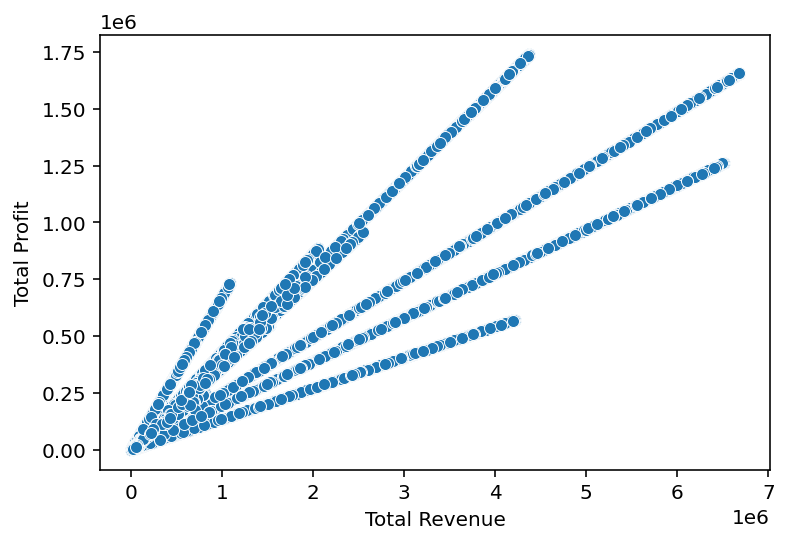

In [66]:
#หลังจากที่เรา Analysis แล้วเราจะมา Visualization กันโดยใช้กราฟรูปแบบต่างๆ ดังนี้ครับ
#1.อันดับแรก เราจะใช้ scatter plot ในการดูการกระจายของข้อมูล และความสัมพันธ์ของข้อมูล ซึ่งจากภาพจะเห็นว่าข้อมูลค่อนข้างสัมพันธ์กัน พูดง่ายๆคือ ถ้า X หรือ Revenue มาก y หรือ Profit จะมากตามนั่นเอง
sns.scatterplot(x = "Total Revenue", y = "Total Profit", data = data)

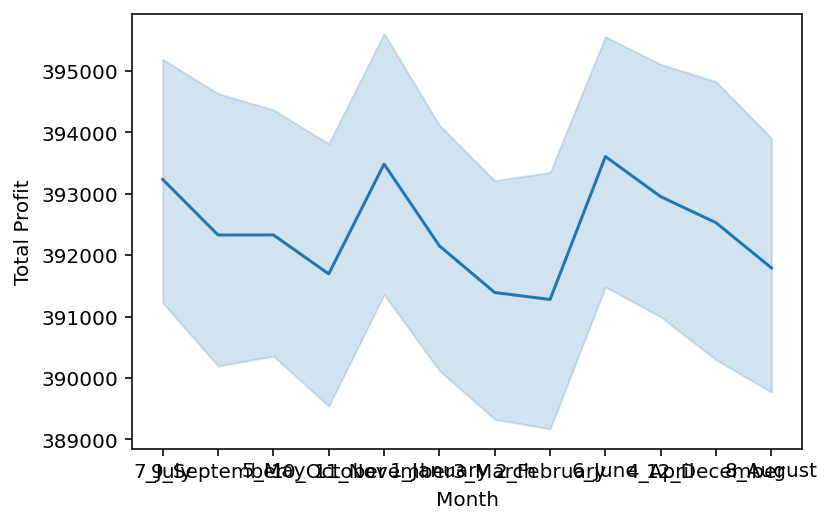

In [67]:
#กราฟต่อมา มาลองทำเป็น Line plot
#การใช้ Line plot ส่วนใหญ่จะเป็นการใช้เพื่อดูแนวโน้ม ตัวอย่างนี้ผมจะดูแนวโน้มการเคลื่อนไหวของ Profit ในแต่ละเดือน
sns.lineplot(x = "Month", y = "Total Profit", data = data)

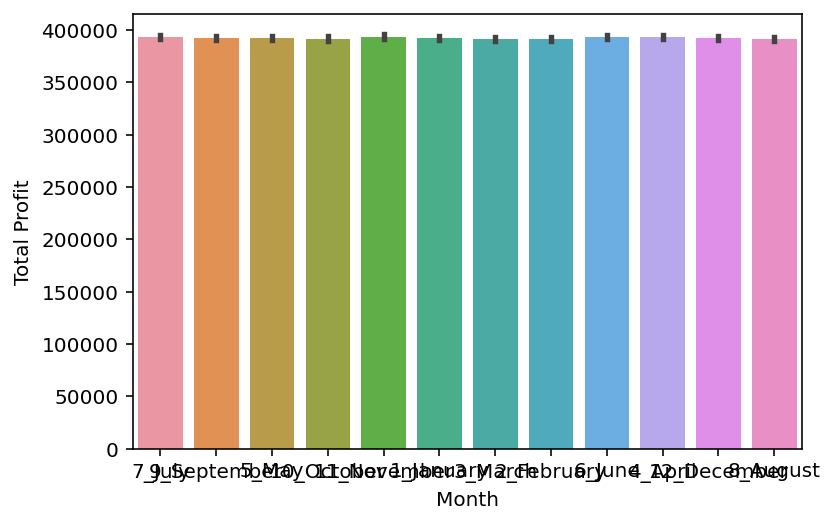

In [68]:
#กราฟต่อมา มาลองทำเป็น Bar plot
#การใช้ Bar plot ส่วนใหญ่จะเป็นการใช้เพื่อดูเพื่อเปรียบเทียบ ตัวอย่างนี้ผมจะดู Profit ในแต่ละเดือนเทียบกัน
sns.barplot(x = "Month", y = "Total Profit", data = data)

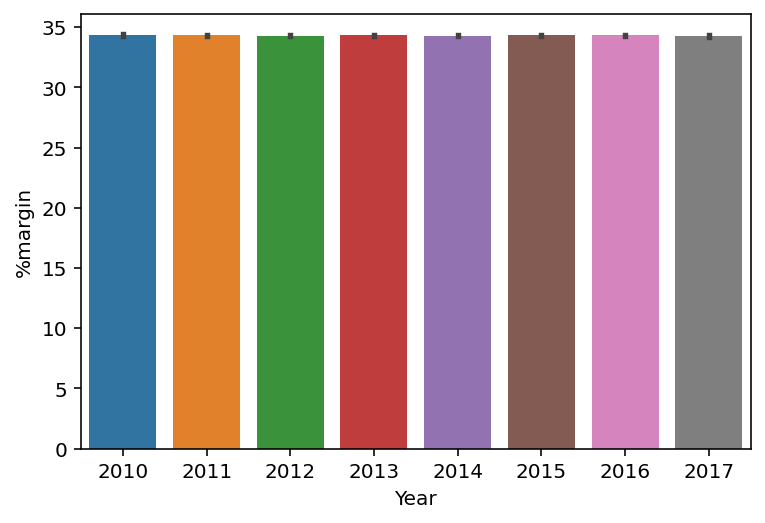

In [69]:
sns.barplot(x = "Year", y = "%margin", data = data)

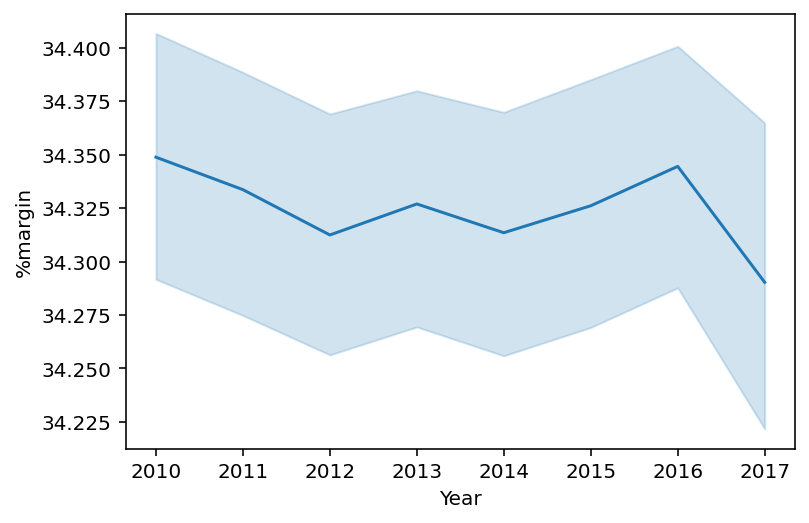

In [70]:
sns.lineplot(x = "Year", y = "%margin", data = data)

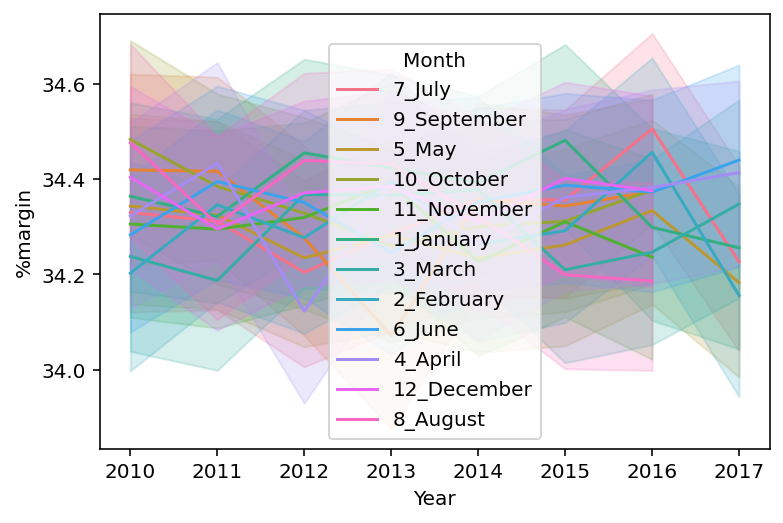

In [71]:
sns.lineplot(x = "Year", y = "%margin", hue =  "Month",data = data)

In [72]:
#จากหลายๆกราฟ จะเห็นได้ว่ากราฟมีขนาดค่อนข้างเล็ก ดูยาก เราจะมาปีับกราฟให้ใหญ่ขึ้นโดยใช้ code ดังกล่าว
sns.set(rc={'figure.figsize':(10,8.24)}) # เรามาขยายรูปกันเถอะ!!

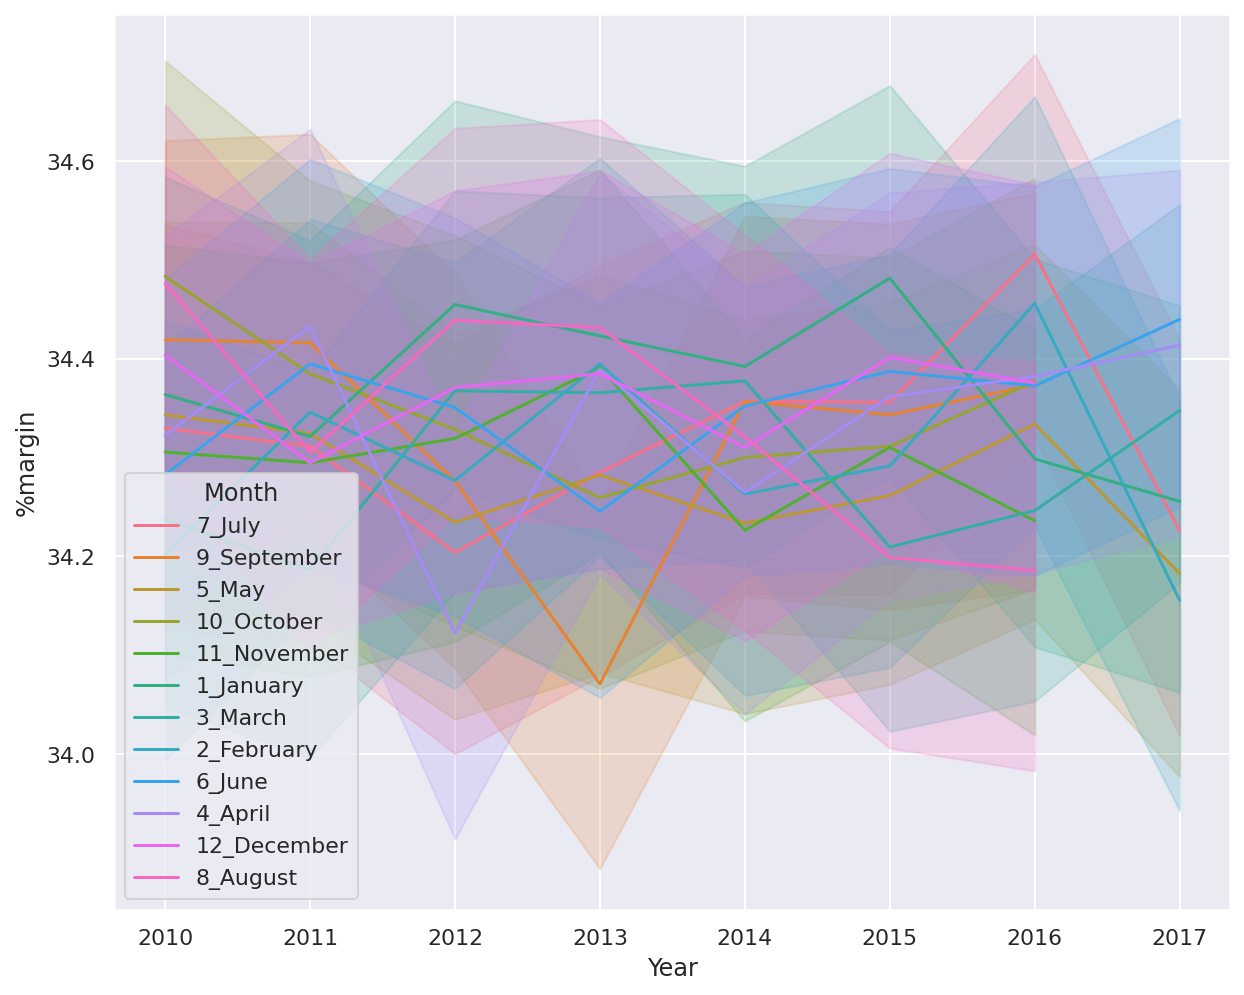

In [73]:
#จะเห็นว่าดูใหญ่ขึ้นมาก
sns.lineplot(x = "Year", y = "%margin", hue =  "Month",data = data)

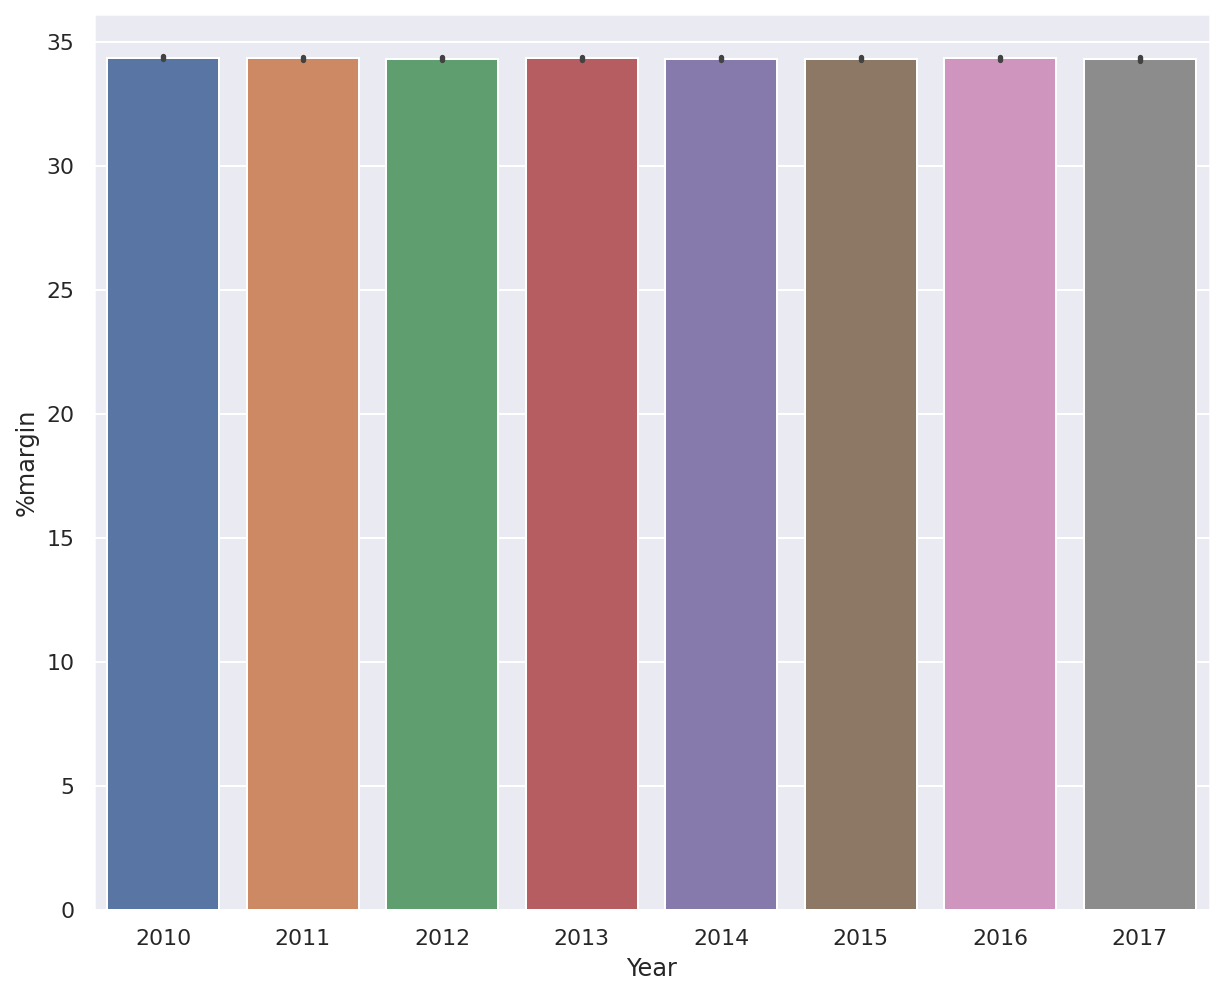

In [74]:
sns.barplot(x = "Year", y = "%margin", data = data)

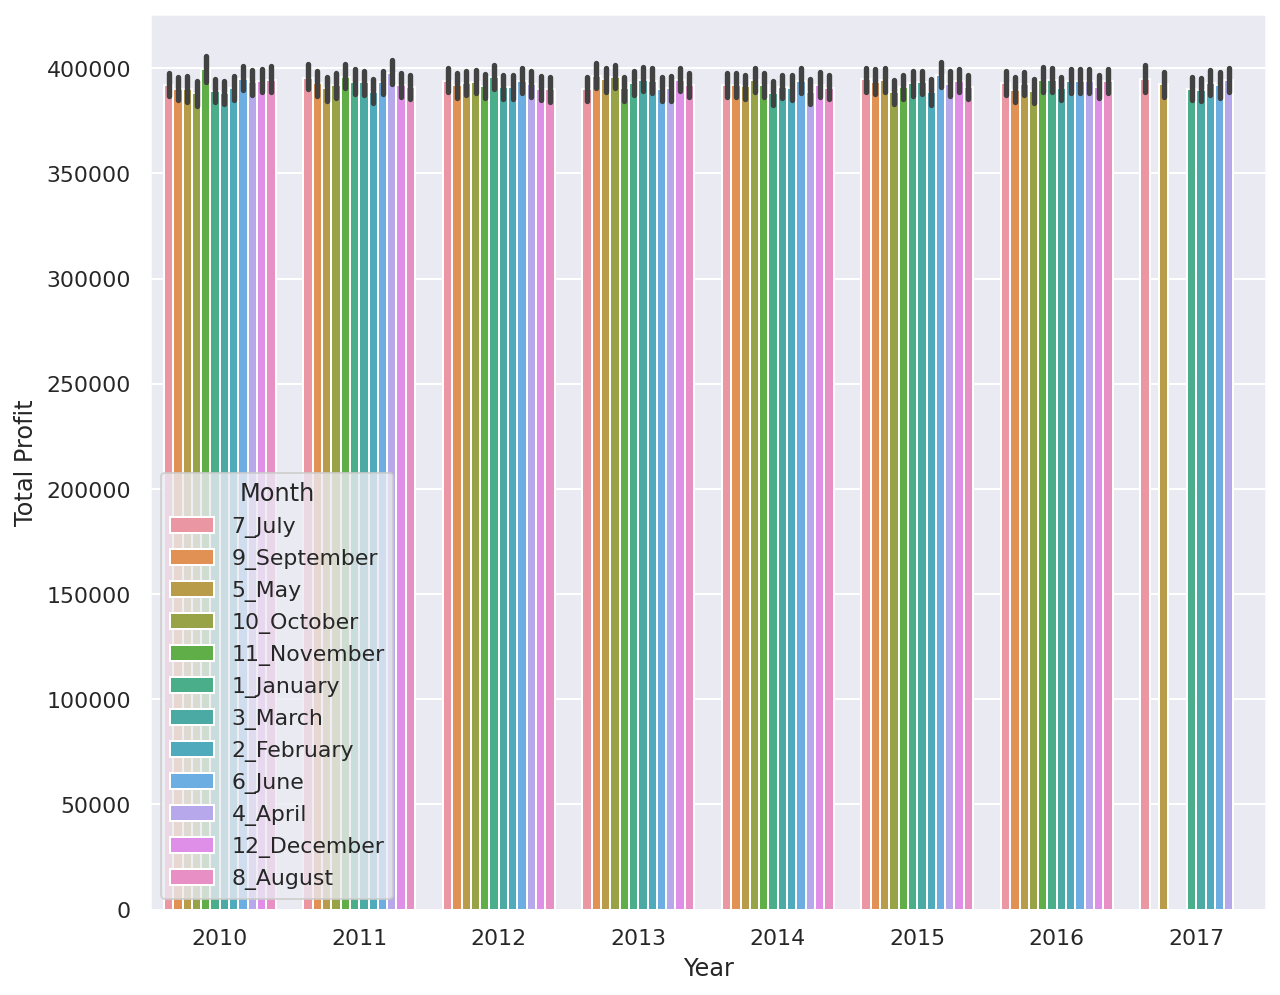

In [75]:
sns.barplot(x = "Year", y = "Total Profit", hue = "Month",data = data)

In [76]:
#สร้างตัวแปรที่ชื่อ margin_top10
margin_top10 = data.sort_values("%margin", ascending = False).head(10)
margin_top10

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision,Year,Month
1087185,Asia,South Korea,Clothes,Offline,H,2/9/2014,770135867,2/10/2014,9172,109.28,35.84,1002316.16,328724.48,673591.68,67.2,good,2014,2_February
108726,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.2,good,2011,2_February
1155029,Australia and Oceania,East Timor,Clothes,Offline,C,3/12/2010,260976207,3/15/2010,7514,109.28,35.84,821129.92,269301.76,551828.16,67.2,good,2010,3_March
402045,Europe,Germany,Clothes,Online,H,6/30/2013,367244899,7/22/2013,4781,109.28,35.84,522467.68,171351.04,351116.64,67.2,good,2013,6_June
402047,Australia and Oceania,Vanuatu,Clothes,Online,M,7/21/2011,586752593,8/4/2011,1986,109.28,35.84,217030.08,71178.24,145851.84,67.2,good,2011,7_July
780931,Asia,Vietnam,Clothes,Offline,H,2/28/2013,621288716,4/2/2013,1992,109.28,35.84,217685.76,71393.28,146292.48,67.2,good,2013,2_February
1155015,Sub-Saharan Africa,Mali,Clothes,Offline,H,12/13/2015,175936019,1/23/2016,2233,109.28,35.84,244022.24,80030.72,163991.52,67.2,good,2015,12_December
108725,Sub-Saharan Africa,Ethiopia,Clothes,Online,C,2/4/2011,222123229,2/17/2011,54,109.28,35.84,5901.12,1935.36,3965.76,67.2,good,2011,2_February
1406423,Sub-Saharan Africa,Comoros,Clothes,Offline,C,11/28/2010,882583510,12/2/2010,4929,109.28,35.84,538641.12,176655.36,361985.76,67.2,good,2010,11_November
1043226,Europe,Montenegro,Clothes,Offline,L,5/13/2011,102287709,5/25/2011,8061,109.28,35.84,880906.08,288906.24,591999.84,67.2,good,2011,5_May


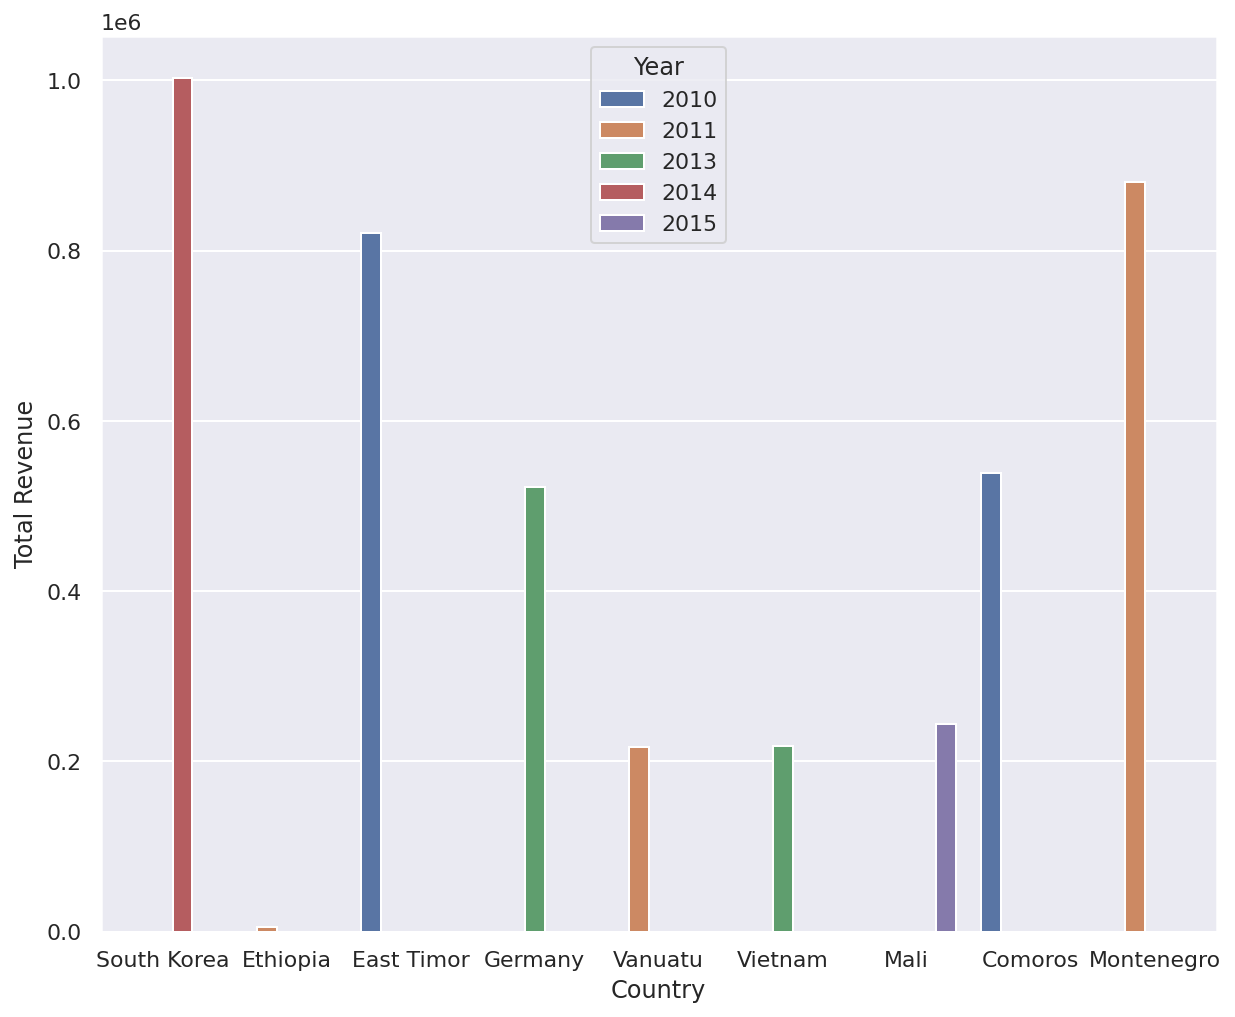

In [77]:
#ลอง plot อีกรอบ จะเห็นว่าข้อมูลดูง่ายขึ้นเยอะเลย
sns.barplot(x = "Country", y = "Total Revenue",hue = "Year",data = margin_top10)

In [78]:
margin_top10["Total Revenue"]

1087185    1002316.16
108726        5901.12
1155029     821129.92
402045      522467.68
402047      217030.08
780931      217685.76
1155015     244022.24
108725        5901.12
1406423     538641.12
1043226     880906.08
Name: Total Revenue, dtype: float64

In [79]:
#ต่อมา เราจะมาทำ pie chart กัน ขั้นแรกเรากำหนดสีก่อน
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

([<matplotlib.patches.Wedge at 0x7f871145b950>,
 [Text(-0.7142252708357255, 0.8365896619607696, 'Asia'),
  Text(-1.087096467668054, 0.1679918747548222, 'Sub-Saharan Africa'),
  Text(-0.9999733794814301, -0.4583156557750216, 'Australia and Oceania'),
  Text(-0.2118141534257815, -1.0794140838475843, 'Europe'),
  Text(0.35394443536457754, -1.0415005216870756, 'Australia and Oceania'),
  Text(0.6516815109194248, -0.8861778649491171, 'Asia'),
  Text(0.9008564855863037, -0.6312349739812377, 'Sub-Saharan Africa'),
  Text(0.9975584450996502, -0.46354843178503846, 'Sub-Saharan Africa'),
  Text(1.0985652110110093, -0.056164732317856736, 'Sub-Saharan Africa'),
  Text(0.6400882575358631, 0.8945876271024001, 'Europe')],
 [Text(-0.38957742045585025, 0.45632163379678337, '22.5%'),
  Text(-0.5929617096371202, 0.09163193168444846, '0.1%'),
  Text(-0.5454400251716891, -0.2499903576954663, '18.4%'),
  Text(-0.11553499277769899, -0.5887713184623186, '11.7%'),
  Text(0.19306060110795137, -0.568091193647495

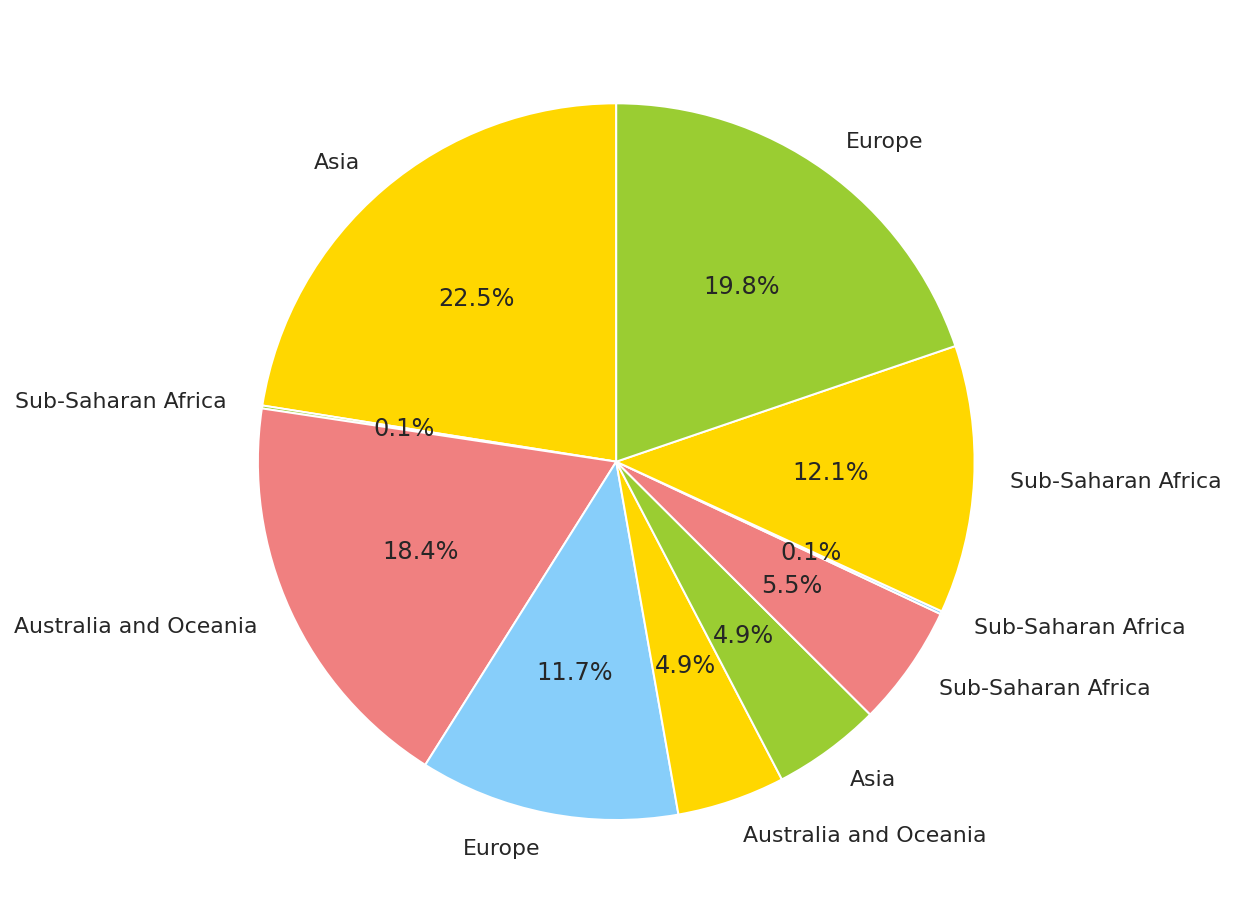

In [80]:
#Labels คือข้อมูลที่เราจะให้โชว์ คือ "Region" นั่นเอง จะเห็นว่า Middle East สัดส่วนเกิน 50%
plt.pie(margin_top10["Total Revenue"], labels=margin_top10["Region"], colors=colors, startangle=90,autopct='%1.1f%%')

Beginning : Machine Learning For bussiness
มาถึงขั้นตอนสุดท้ายแล้ว เรามาทำ Prediction กันด้วย Linear regression กันครับ

In [81]:
#ก่อนอื่น เราต้อง import library ที่ใช้ในการทำก่อนนะครับ
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [82]:
#เช็ค Version
print(f'sklern version : {sklearn.__version__}')

sklern version : 0.22.2.post1


In [83]:
#เราจะมากำหนด Model กันครับ
model = LinearRegression(normalize = True, n_jobs = -1)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [84]:
#x เราเรียกว่า dependent y คือ independaent และที่เราใช้ [[]] เพราะจะทำเป็น 2D Array
X = data[['Total Revenue','Total Cost']]
y = data['%margin'] #หรือ data.%margin ที่ไม่ใช้เพราะมันติด % นั่นเอง

In [85]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [86]:
#อันนี้คือค่า R-square คือยังมากยิ่งดี แต่ที่ได้นี่ ค่อนข้างน้อยมาก
model.score(X,y)

0.5312463604621267

In [87]:
model.coef_ #หรือที่เราเรียกว่า slope นั่นเอง

array([ 3.38013701e-05, -4.75858163e-05])

In [88]:
model.intercept_

33.98553431465952

In [89]:
#เขียนสมการทำนายได้ดังนี้ เช่นถ้าอยากทำนาย x = 50000,20000

#หรือพูดเป็นภาษาธุรกิจคือ ถ้ามีรายได้ 50,000 ,Cost 20,000 จะได้ค่า %margin จะเป็นเท่าไรนั่นเอง

model.intercept_ + (-3.38013701e-05* 50000)+(-4.75858163e-05*20000)

31.34374948365952

In [90]:
model.predict([[50000,20000]])

array([34.72388649])

In [91]:
#ถ้าอยากทำนาย 2 ตัวแปรล่ะ
model.predict([[50000,20000],[70000,60000]])

array([34.72388649, 33.49648124])

In [92]:
#ต่อมา Predict จากข้อมูลกันเลย
y_pred = model.predict(data[["Total Revenue","Total Cost"]]) #อันนี้เอา Columns Total มา Predict เลย
y_pred

array([33.9633485 , 33.9633485 , 43.15376114, ..., 36.77049709,
       39.81259888, 34.41462739])

In [93]:
#เราสร้าง Columns ใหม่ชื่อว่า y_act คือค่า Actual นั่นเอง เพื่อจะเอามาเทียบกับตัว Model ที่เราทำไว้
y_act = data[["%margin"]]

In [94]:
#เช็ค Mean Square error กัน
mean_squared_error(y_act, y_pred)

81.067238978305

In [95]:
#เช็ค Root Mean Square error กัน แปลว่า ข้อมูลเรา Error +- ไปถึง9.00 เช่น Actual 10 Model ไปทำนาย 1 หรือ 19 เป็นต้น
mean_squared_error(y_act, y_pred) **0.5 

9.0037347238968

In [96]:
#เอา Model มาใส่เลย จะได้ดังนี้
data["model"] = model.predict(data[["Total Revenue","Total Cost"]])
data.head()

,Region,Country,Item_Type,Sales Channel,Order Priority,Order_Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,%margin,decision,Year,Month,model
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad,2012,7_July,33.963348
1,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,25.83,bad,2012,7_July,33.963348
2,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9_September,43.153761
3,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,67.20,good,2013,9_September,43.153761
4,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,13.56,bad,2015,5_May,32.871834


In [101]:
#เราจะเอาตัวอย่างข้อมูล 1000 ตัวอย่างแบบเรียงจากมากไปน้อย
margin_top1000_model = data.sort_values("%margin", ascending = False).head(1000)

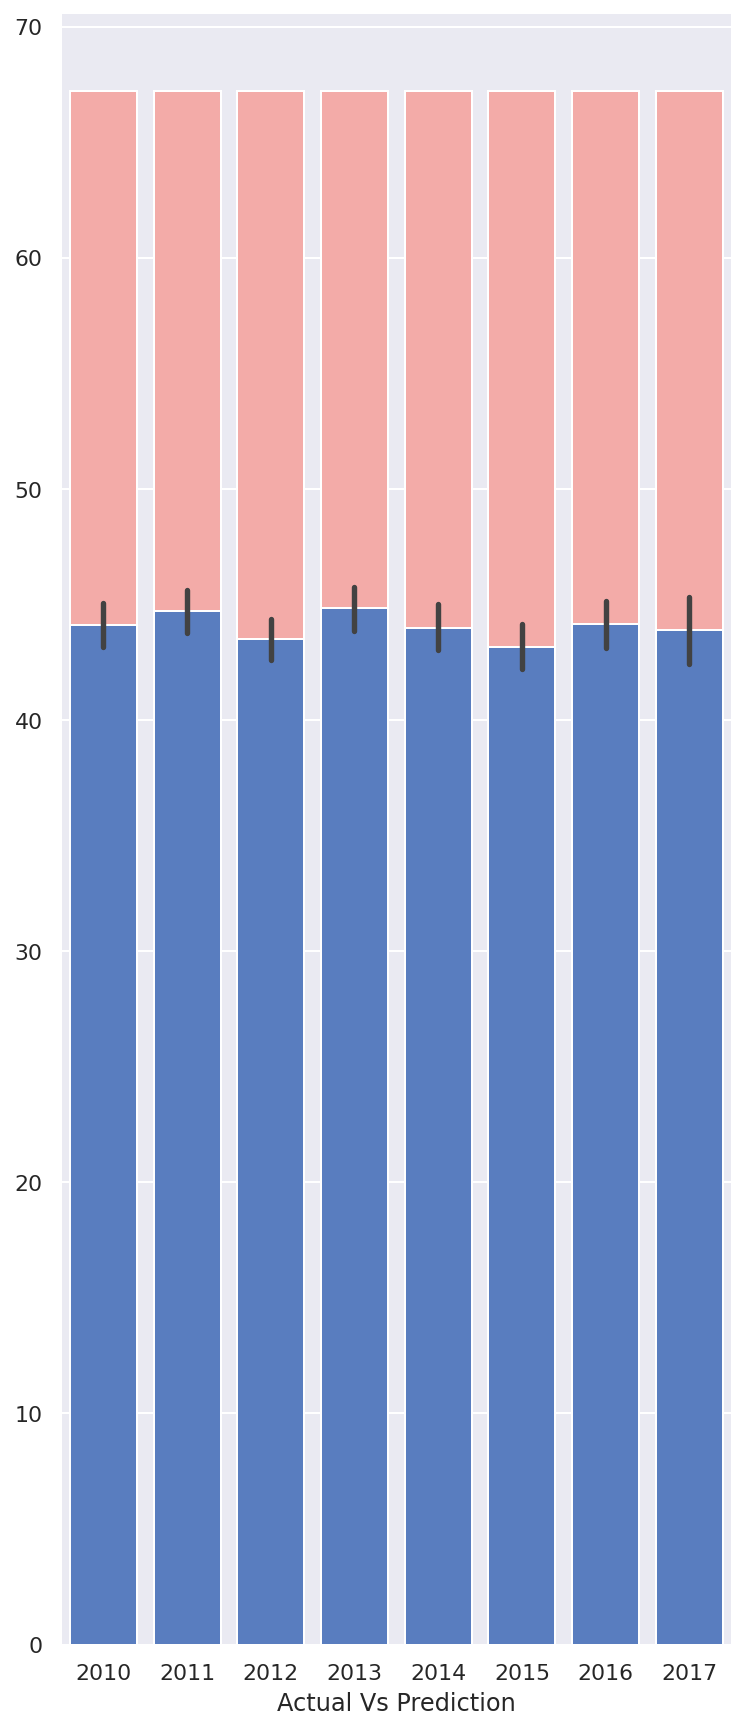

In [103]:
# Plot 2 กราฟคือ Model vs Actual ซึ่งสีพาสเทลคือ Actual และ Prediction คือ สีทึบ
f, ax = plt.subplots(figsize=(6, 15))
#Graph แรก Actual
sns.set_color_codes("pastel")
sns.barplot(x="Year", y="%margin", data=margin_top1000_model,
            label="Actual", color="r")

#Graph สอง Model ที่ทำนายได้
sns.set_color_codes("muted")
sns.barplot(x="Year", y="model", data=margin_top1000_model,
            label="Prediction", color="b")

# Add a legend and informative axis label
ax.set(ylabel="",
       xlabel="Actual Vs Prediction")
sns.despine(left=True, bottom=True)